<center><h2>Gabriel Coutinho Chaves - 15111760 (nUSP)</h2>

In [2]:
# Bibliotecas 

import numpy as np
import sympy as smp
import matplotlib.pyplot as plt


plt.style.use('default')


$$f(x) = 63x^5 - 381x^4 + 496x^3 + 204x^2 - 544x + 192$$

In [2]:
N = 100
x1 = np.linspace(0,1,N)
x2 = np.linspace(1,2,N)


f =  lambda x : 63*x**5 - 381*x**4 + 496*x**3 + 204*x**2 - 544*x + 192
dfdx = lambda x : 5*63*x**4 - 381*4*x**3 + 496*3*x**2 - 209*2*x - 544

# Análise do Intervalo e Cálculo da Solução Exata

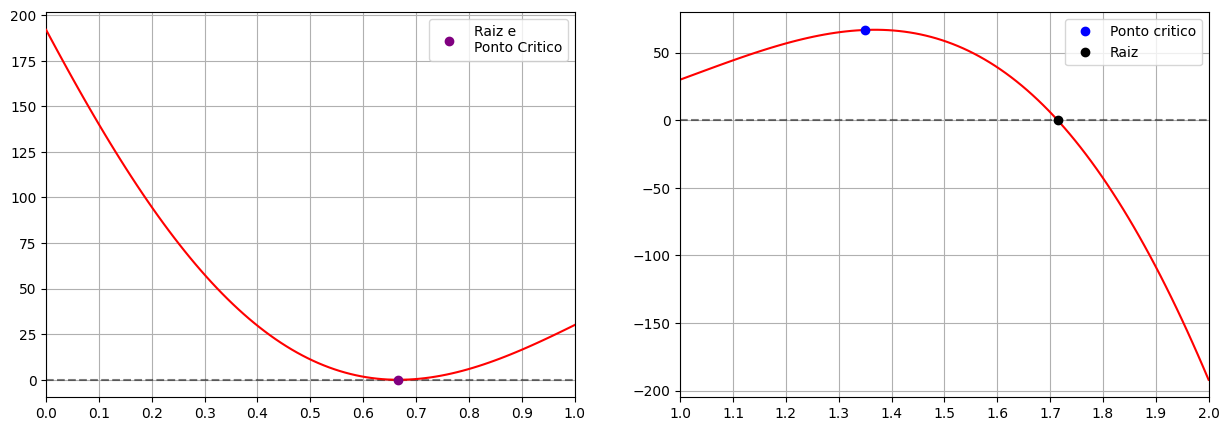

In [3]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(x1,f(x1),'r', zorder=3)
ax[0].hlines(0,0,1,color='black',linestyles='--',alpha=0.5)
ax[0].set_xticks(np.arange(0,1.05,0.1))
ax[0].set_xlim(0,1)
ax[0].plot(2/3,0,'o',color='purple', zorder = 4, label='Raiz e\nPonto Critico')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(x2,f(x2),'r')
ax[1].hlines(0,1,2,color='black',linestyles='--',alpha=0.5)
ax[1].set_xticks(np.arange(1,2.05,0.1))
ax[1].plot(1.35,f(1.35),'o',color='blue',label='Ponto critico')
ax[1].plot(12/7,0,'o',color='black', label='Raiz')
ax[1].set_xlim(1,2)
ax[1].grid(True)
ax[1].legend()

plt.show()

In [3]:
# Solução Exata usando Sympy (Computação Simbólica)

x = smp.symbols('x')
h =  63*x**5 - 381*x**4 + 496*x**3 + 204*x**2 - 544*x + 192
sol = smp.solve(h,x,numerical=True )
print(sol)

[-1, 2/3, 12/7, 4]


# Método da Bisseção

In [9]:
from numpy.linalg import norm
from numpy import round

np.set_printoptions(precision=8) # precisão

# Método da Bisseção

def bissecao(f, a, b, e, kmax):
    fa, fb = f(a), f(b)  # valor de f(a0) e f(b0)
    
    # checa se alguma das extremidades ja eh raiz ou se existe uma raiz entre as extremidades
    if fa == 0:
        return a
    elif fb == 0:
        return b
    elif fa * fb > 0:
        print('erro (mesmo sinal)')
        return np.nan
    
    print(f'{"k":^3}|{"a":^12}|{"b":^12}|{"x":^12}|{"f(x)":^12}|{"erro":^12}')  # Cabecalho da tabela
    
    x0 = a  # declara-se uma variavel x0 com o valor de a0
    for k in range(1, kmax + 1):
        x = (a + b) / 2
        fx = f(x)
        erro = norm(x - x0)
        
        print(f'{k:^3}|{a:^12.8f}|{b:^12.8f}|{x:^12.8f}|{fx:^12.8f}|{erro:^12.8f}')  # Corpo da tabela
        
        if fx == 0 or erro < e * (1 + norm(x)):
            return x
        
        if fx * fa < 0:
            b = x
        else:
            a, fa = x, fx
        
        x0 = x
    
    print('Número máximo de iterações atingido')
    return None


In [5]:
bissecao(f,0,1,10e-6,100)

Erro: f(a) e f(b) têm o mesmo sinal


In [10]:
bissecao(f,1,2,10e-6,100)

 k |     a      |     b      |     x      |    f(x)    |    erro    
 1 | 1.00000000 | 2.00000000 | 1.50000000 |58.59375000 | 0.50000000 
 2 | 1.50000000 | 2.00000000 | 1.75000000 |-16.33886719| 0.25000000 
 3 | 1.50000000 | 1.75000000 | 1.62500000 |32.20687866 | 0.12500000 
 4 | 1.62500000 | 1.75000000 | 1.68750000 |10.92908192 | 0.06250000 
 5 | 1.68750000 | 1.75000000 | 1.71875000 |-1.93078968 | 0.03125000 
 6 | 1.68750000 | 1.71875000 | 1.70312500 | 4.68964237 | 0.01562500 
 7 | 1.70312500 | 1.71875000 | 1.71093750 | 1.42743798 | 0.00781250 
 8 | 1.71093750 | 1.71875000 | 1.71484375 |-0.23962526 | 0.00390625 
 9 | 1.71093750 | 1.71484375 | 1.71289062 | 0.59691308 | 0.00195312 
10 | 1.71289062 | 1.71484375 | 1.71386719 | 0.17939633 | 0.00097656 
11 | 1.71386719 | 1.71484375 | 1.71435547 |-0.02992627 | 0.00048828 
12 | 1.71386719 | 1.71435547 | 1.71411133 | 0.07478207 | 0.00024414 
13 | 1.71411133 | 1.71435547 | 1.71423340 | 0.02243966 | 0.00012207 
14 | 1.71423340 | 1.71435547 | 1.7

1.7142791748046875

# Método de Newton

In [8]:
# Método de Newton

def m_newton(f, dfdx, x0, e, kmax):
    k = 0
    fx0 = f(x0)
    dfdx0 = dfdx(x0)
    print(f'{"k":^3}|{"x":^12}|{"f(x)":^12}|{"df(x)dx":^12}|{"erro":^12}')
    while k<kmax+1:
        x = x0 - fx0/dfdx0
        print(f'{k:^3}|{x0:^12.8f}|{fx0:^12.8f}|{dfdx0:^12.8f}|{norm(x-x0):^12.8f}')  # Corpo da tabela
        if norm(x-x0)<e*(1+norm(x)):
            return (x)
        x0 = x
        fx0 = f(x0)
        dfdx0 = dfdx(x0)
        k+=1
        
    print('Número máximo de iterações atingido')
    return None

In [9]:
x0 = 2
m_newton(f, dfdx, x0, 10e-6, 100)

 k |     x      |    f(x)    |  df(x)dx   |    erro    
 0 | 2.00000000 |-192.00000000|-2580.00000000| 0.07441860 
 1 | 1.92558140 |-128.03608410|-2381.93714145| 0.05375292 
 2 | 1.87182847 |-88.10384002|-2240.85857750| 0.03931700 
 3 | 1.83251147 |-62.15307483|-2139.26048112| 0.02905353 
 4 | 1.80345794 |-44.70593417|-2065.24666295| 0.02164678 
 5 | 1.78181116 |-32.64348092|-2010.76497955| 0.01623436 
 6 | 1.76557680 |-24.11337316|-1970.30770152| 0.01223838 
 7 | 1.75333842 |-17.97155736|-1940.04905598| 0.00926346 
 8 | 1.74407497 |-13.48594635|-1917.28833414| 0.00703386 
 9 | 1.73704110 |-10.17312170|-1900.09011580| 0.00535402 
10 | 1.73168708 |-7.70501894 |-1887.04895324| 0.00408310 
11 | 1.72760398 |-5.85373293 |-1877.13276505| 0.00311844 
12 | 1.72448553 |-4.45779131 |-1869.57661451| 0.00238439 
13 | 1.72210115 |-3.40090787 |-1863.80929767| 0.00182471 
14 | 1.72027644 |-2.59821308 |-1859.40171133| 0.00139734 
15 | 1.71887910 |-1.98709511 |-1856.02996603| 0.00107062 
16 | 1.7178084

1.7143721883625866

In [10]:
x0 = 0.6
m_newton(f, dfdx, x0, 10e-6, 100)

 k |     x      |    f(x)    |  df(x)dx   |    erro    
 0 | 0.60000000 | 1.69728000 |-547.48000000| 0.00310017 
 1 | 0.60310017 | 1.54037731 |-547.50464432| 0.00281345 
 2 | 0.60591362 | 1.40477687 |-547.53668760| 0.00256563 
 3 | 0.60847925 | 1.28673104 |-547.57402553| 0.00234988 
 4 | 0.61082913 | 1.18329033 |-547.61508516| 0.00216081 
 5 | 0.61298993 | 1.09210614 |-547.65868318| 0.00199414 
 6 | 0.61498407 | 1.01128849 |-547.70392515| 0.00184641 
 7 | 0.61683048 | 0.93930183 |-547.75013274| 0.00171484 
 8 | 0.61854532 | 0.87488751 |-547.79679073| 0.00159710 
 9 | 0.62014242 | 0.81700557 |-547.84350787| 0.00149131 
10 | 0.62163373 | 0.76479031 |-547.88998778| 0.00139588 
11 | 0.62302962 | 0.71751618 |-547.93600702| 0.00130949 
12 | 0.62433911 | 0.67457117 |-547.98139855| 0.00123101 
13 | 0.62557012 | 0.63543604 |-548.02603907| 0.00115950 
14 | 0.62672962 | 0.59966778 |-548.06983930| 0.00109414 
15 | 0.62782376 | 0.56688653 |-548.11273651| 0.00103425 
16 | 0.62885801 | 0.53676496 |-5

# Método das Secantes

In [11]:
# Método das Secantes

def m_secantes(f, x0, x1, e, kmax):
    k = 0
    fx0 = f(x0)
    fx1 = f(x1)
    print(f'{"k":^3}|{"x":^15}|{"f(x)":^15}|{"erro":^15}')
    while k<kmax+1:
        x = x1 - fx1*(x1-x0)/(fx1-fx0)
        print(f'{k:^3}|{x0:^15.8f}|{fx0:^15.8f}|{norm(x-x0):^15.8f}')  # Corpo da tabela
        if norm(x-x0)<e*(1+norm(x)):
            return (x)
        x0 = x1
        x1 = x
        fx0 = f(x0)
        fx1 = f(x1)
        k+=1
        
    print('Número máximo de iterações atingido')
    return None

In [12]:
x0 = 0.1
x1 = 0.8
m_secantes(f, x0, x1, 10e-6, 100)

 k |       x       |     f(x)      |     erro      
 0 |  0.10000000   | 140.09853000  |  0.73076572   
 1 |  0.80000000   |  5.89824000   |  0.06484330   
 2 |  0.83076572   |  8.69673386   |  0.11781567   
 3 |  0.73515670   |  1.63921632   |  0.04144413   
 4 |  0.71295004   |  0.76088906   |  0.02942121   
 5 |  0.69371257   |  0.26337097   |  0.01673383   
 6 |  0.68352883   |  0.10309087   |  0.01049101   
 7 |  0.67697873   |  0.03872576   |  0.00638435   
 8 |  0.67303782   |  0.01482122   |  0.00394528   
 9 |  0.67059438   |  0.00564196   |  0.00242955   
10 |  0.66909254   |  0.00215435   |  0.00150026   
11 |  0.66816483   |  0.00082217   |  0.00092625   
12 |  0.66759228   |  0.00031396   |  0.00057220   
13 |  0.66723858   |  0.00011989   |  0.00035351   
14 |  0.66702008   |  0.00004579   |  0.00021844   
15 |  0.66688507   |  0.00001749   |  0.00013499   
16 |  0.66680164   |  0.00000668   |  0.00008342   
17 |  0.66675008   |  0.00000255   |  0.00005155   
18 |  0.6667

0.6666741878497926

In [13]:
x0 = 1.1
x1 = 1.9
m_secantes(f, x0, x1, 10e-6, 100)

 k |       x       |     f(x)      |     erro      
 0 |  1.10000000   |  44.25603000  |  0.23195021   
 1 |  1.90000000   | -108.38373000 |  0.35238931   
 2 |  1.33195021   |  66.33029717  |  0.92785304   
 3 |  1.54761069   |  50.91317478  |  0.06644300   
 4 |  2.25980325   | -494.81747692 |  0.60269403   
 5 |  1.61405370   |  35.34899450  |  0.11399451   
 6 |  1.65710922   |  21.99774066  |  0.05562954   
 7 |  1.72804821   |  -6.05385213  |  0.01380096   
 8 |  1.71273877   |  0.66170252   |  0.00154706   
 9 |  1.71424725   |  0.01649881   |  0.00003846   
10 |  1.71428582   |  -0.00004708  |  0.00000011   


1.7142857142857149